<a href="https://colab.research.google.com/github/shubhanker2603/IBM-data-analytics-project/blob/main/IBM_data_analytics_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing libraries and Data set**

In [104]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime 
import matplotlib.pyplot as plt


In [105]:
weatherdata = pd.read_csv("Weather Data.csv")
weatherdata

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


# **Describing and  cleaning data**

In [106]:
weatherdata.describe()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,1959.000000,18.423248,20.137949,23.434188,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333
std,33.919021,33.919021,0.612963,0.900944,0.862825,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912
min,0.000000,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000
25%,29.000000,1930.000000,18.070000,19.470000,22.840000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000
50%,58.000000,1959.000000,18.350000,19.990000,23.330000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000
75%,87.000000,1988.000000,18.720000,20.550000,23.930000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000
max,116.000000,2017.000000,20.920000,23.580000,26.610000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000


In [107]:
weatherdata = weatherdata.drop(columns=['Unnamed: 0'])
weatherdata.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [108]:
weatherdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    117 non-null    int64  
 1   JAN     117 non-null    float64
 2   FEB     117 non-null    float64
 3   MAR     117 non-null    float64
 4   APR     117 non-null    float64
 5   MAY     117 non-null    float64
 6   JUN     117 non-null    float64
 7   JUL     117 non-null    float64
 8   AUG     117 non-null    float64
 9   SEP     117 non-null    float64
 10  OCT     117 non-null    float64
 11  NOV     117 non-null    float64
 12  DEC     117 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 12.0 KB


**Converting data into dates format of easier visualisation and understandings**

In [109]:
dates = {}

i = 0
for y in weatherdata['YEAR']:
    for m in weatherdata.columns[1:]:
        
        dat = str(m) + '/' + str(y)
        dates[dat] = weatherdata[m][i]
    i += 1
    
dates = pd.DataFrame(pd.Series(dates).reset_index())
dates.columns = ['date', 'temp']

dates['date'] = pd.to_datetime(dates['date'], format= '%b/%Y')
dates['year'] = dates['date'].dt.year
dates['month'] = dates['date'].dt.month_name()

dates.head()

,date,temp,year,month
0,1901-01-01,17.99,1901,January
1,1901-02-01,19.43,1901,February
2,1901-03-01,23.49,1901,March
3,1901-04-01,26.41,1901,April
4,1901-05-01,28.28,1901,May


**Variation of Temperature with each passing month**

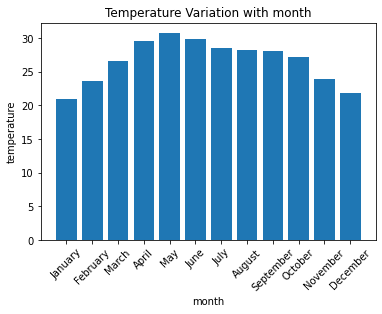

In [110]:
month = dates['month']
temp = dates['temp']
plt.bar(month,temp)
plt.title('Temperature Variation with month')
plt.xlabel('month')
plt.ylabel('temperature')
plt.xticks(rotation=45)
plt.show()